## 1) Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
# !git clone https://github.com/nasirtrekker/DeepLearning_MaskRCNN.git

In [5]:
ls

 build/                               dist/
 CarPartsDamageDetection/             phm-ieee-2012-data-challenge-dataset/
 CarPartsDetectionChallenge-master/   Predictive_Maintenance/
'Colab Notebooks'/                    SOMPY/
 DeepLearning_MaskRCNN/               SOMPY.egg-info/


In [6]:
%cd /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN

/content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN


## 2) Car Damage Detection with MaskRCNN

#### Data visualization of car damage and automated car damage detection  

In [7]:
# !git clone https://github.com/matterport/Mask_RCNN.git

In [8]:
%cd Mask_RCNN/

/content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN


In [9]:
!pip3 install -r '/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN/requirements.txt'

In [10]:
!python3 setup.py install

/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
adding licens

In [11]:
# !pip install tensorflow==1.14.0
!pip install keras==2.4.0

In [12]:
!pip show mask_rcnn

Name: mask-rcnn
Version: 2.1
Summary: Mask R-CNN for object detection and instance segmentation
Home-page: https://github.com/matterport/Mask_RCNN
Author: Matterport
Author-email: waleed.abdulla@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages/mask_rcnn-2.1-py3.7.egg
Requires: 
Required-by: 


In [13]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.5.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: gast, keras-nightly, tensorflow-estimator, astunparse, flatbuffers, protobuf, typing-extensions, termcolor, absl-py, h5py, opt-einsum, numpy, tensorboard, grpcio, six, keras-preprocessing, wheel, google-pasta, wrapt
Required-by: Keras, kapre


In [14]:
!pip3 show keras

Name: Keras
Version: 2.4.0
Summary: Deep Learning for humans
Home-page: https://github.com/keras-team/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: tensorflow, scipy, h5py, numpy, pyyaml
Required-by: keras-vis


In [15]:
!pip3 show tensorflow-estimator

Name: tensorflow-estimator
Version: 2.5.0
Summary: TensorFlow Estimator.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: None
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: 
Required-by: tensorflow


In [16]:
# !pip3 install --upgrade tensorflow
# !pip3 install --upgrade tensorflow-gpu

In [17]:
%cd /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN/

/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN


In [18]:
%pwd

'/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN'

In [19]:
# !pip3 install -r '/content/drive/MyDrive/car-damage-detection-using-CNN/requirements.txt'

In [20]:
# Import all the packages of Matterport Mask R-CNN 
import os
import sys
import itertools
import math
import logging
import json
import re
import random
from collections import OrderedDict
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon
from tensorflow import keras
# Root directory of the project
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # To find local version of the library

# Import Mask RCNN packages
import mrcnn 
from mrcnn import utils
from mrcnn.config import Config
from mrcnn import visualize
from mrcnn.visualize import display_images
from mrcnn import model
import mrcnn.model as modellib
from mrcnn.model import log
import cv2
import custom
import imgaug,h5py,IPython

%matplotlib inline

Using TensorFlow backend.


## 3) Set up the configuration for root directory,data path setting, log file path and model object(weight matrix) for inference 

In [21]:
pwd

'/content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN'

In [22]:
cd ..

/content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN


In [23]:
ROOT_DIR = os.getcwd()
print(" ROOT_DIR =",ROOT_DIR)

 ROOT_DIR = /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN


In [24]:
# Root Directory
ROOT_DIR = os.getcwd()
sys.path.append(ROOT_DIR)  # Local version of the library
print(" ROOT_DIR =",ROOT_DIR)

# Log Directory
MODEL_DIR = os.path.join(ROOT_DIR, "logs/")
print(" MODEL_DIR =",MODEL_DIR)

# Trained Model Path
custom_WEIGHTS_PATH = "logs/mask_rcnn_coco.h5"  # Best performing iteration weights

# Configurations
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "custom/")
print(" custom_DIR =",custom_DIR)

 ROOT_DIR = /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN
 MODEL_DIR = /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/logs/
 custom_DIR = /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/


## 4) Loading the training data

In [25]:
# Load dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "train")
dataset.prepare()

print(" Count of Images = {}".format(len(dataset.image_ids)))
print(" Count of Classes = {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

 Count of Images = 49
 Count of Classes = 2
  0. BG                                                
  1. damage                                            


## 5) Visualizing some car damaged images

The random sample images of the damaged cars along with the segmented parts are as follows: 


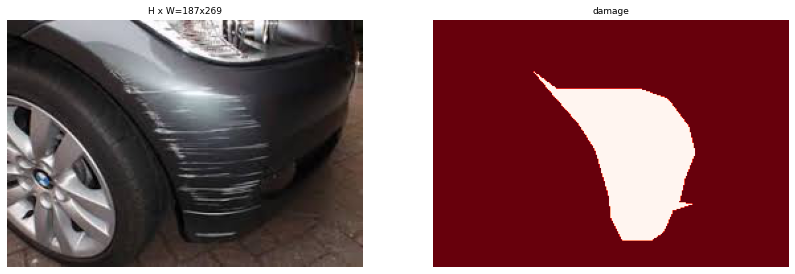

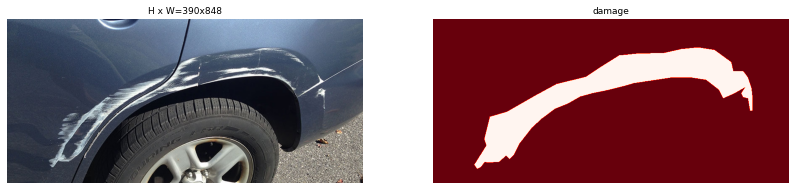

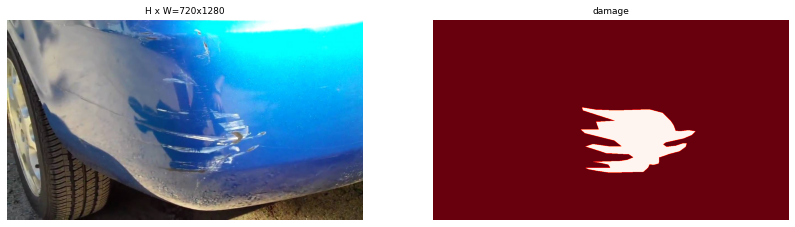

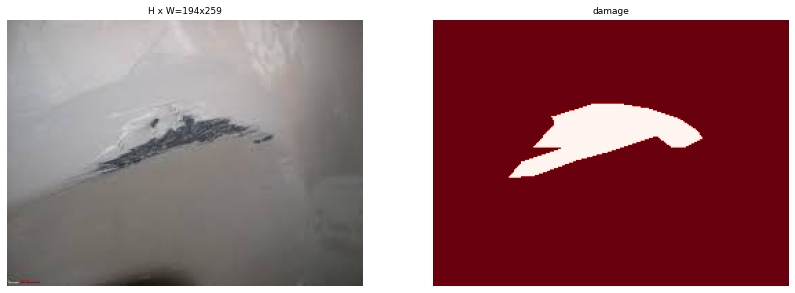

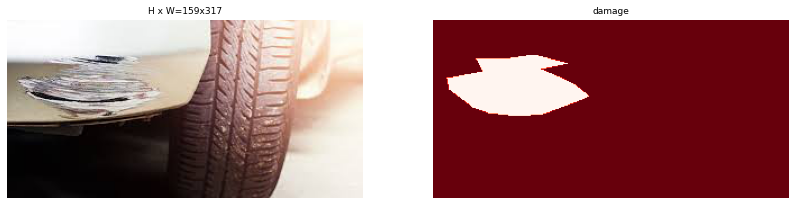

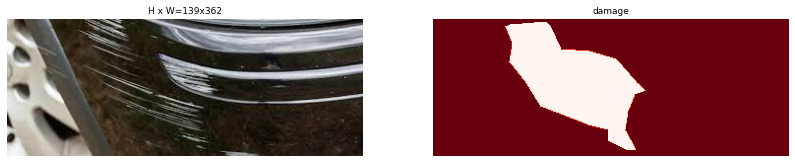

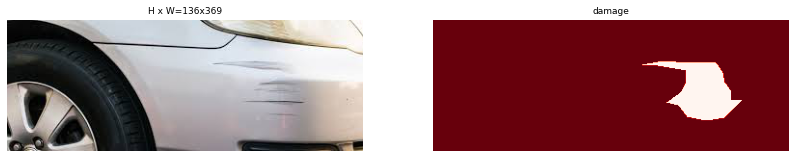

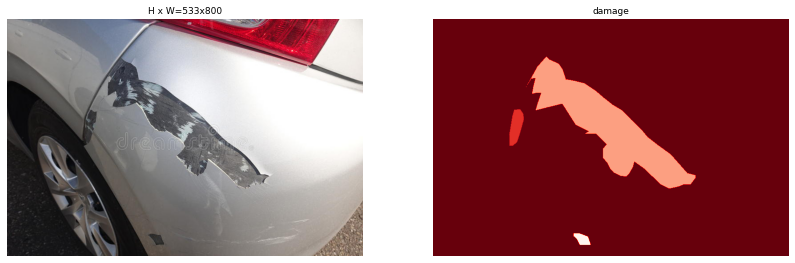

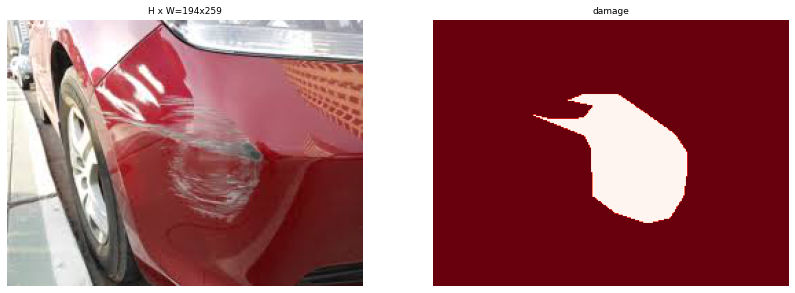

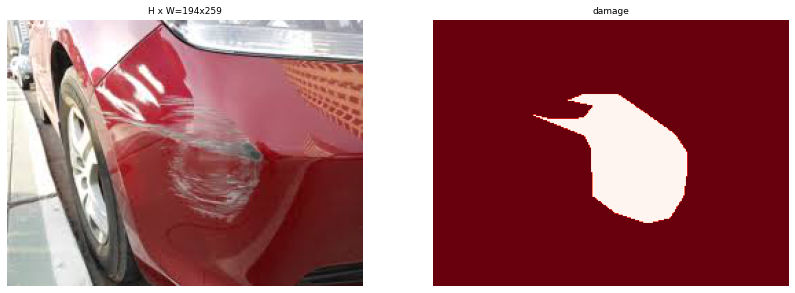

In [26]:
# Display the random image samples
image_ids = np.random.choice(dataset.image_ids, 10)
print("The random sample images of the damaged cars along with the segmented parts are as follows: ")
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

## 6) Bounding Box with annotated damage mask for a car image.

image_id  47 /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/images45.jpg
image                    shape: (168, 300, 3)         min:    0.00000  max:  255.00000  uint8
mask                     shape: (168, 300, 2)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (2, 4)                min:    0.00000  max:  298.00000  int32


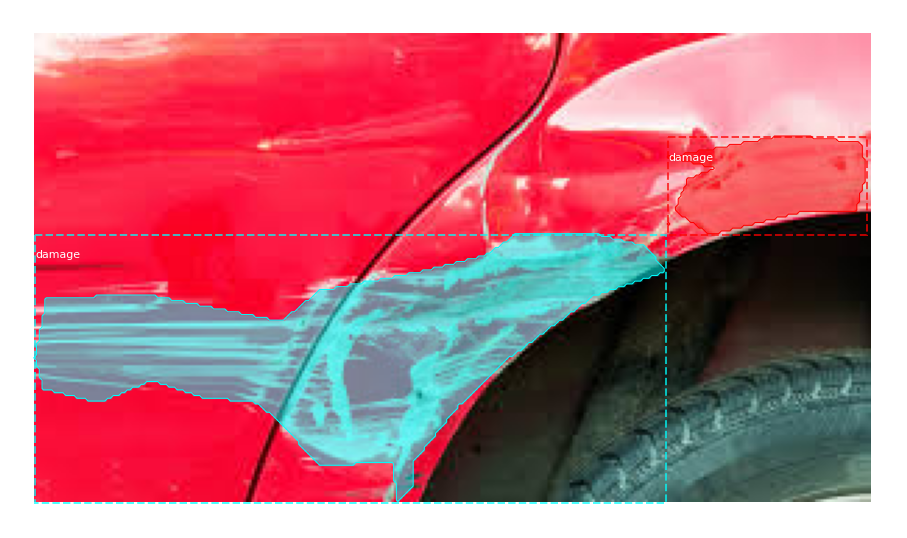

In [27]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Calculate the Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional statistics
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

# Display image and their respective instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id  42 /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/image47.jpg
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
mask                     shape: (720, 1280, 1)        min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  315.00000  max:  943.00000  int32


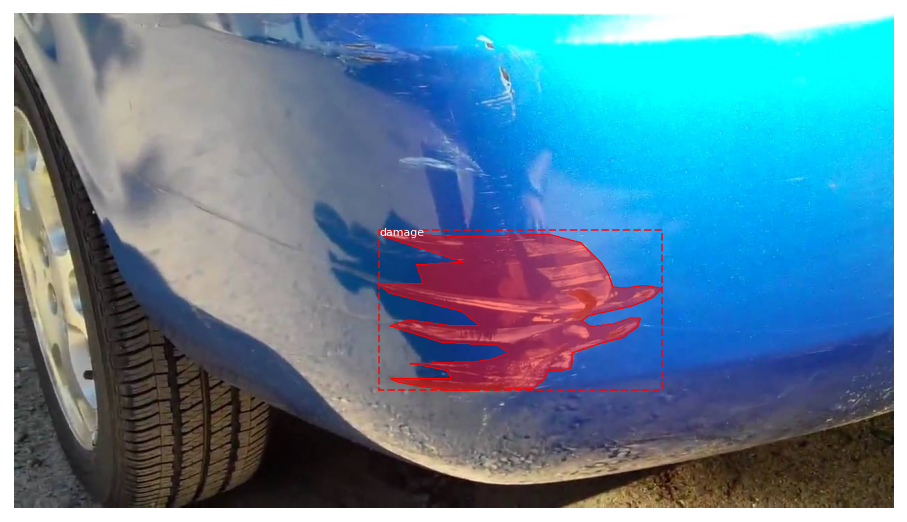

In [28]:
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)

# Calculate the Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional statistics
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)

# Display image and their respective instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    1.00000  max: 1024.00000  float64
class_ids                shape: (2,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (2, 4)                min:  401.00000  max:  824.00000  int32
mask                     shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool


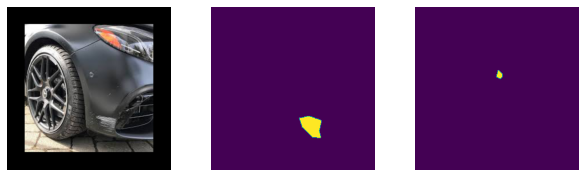

In [29]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

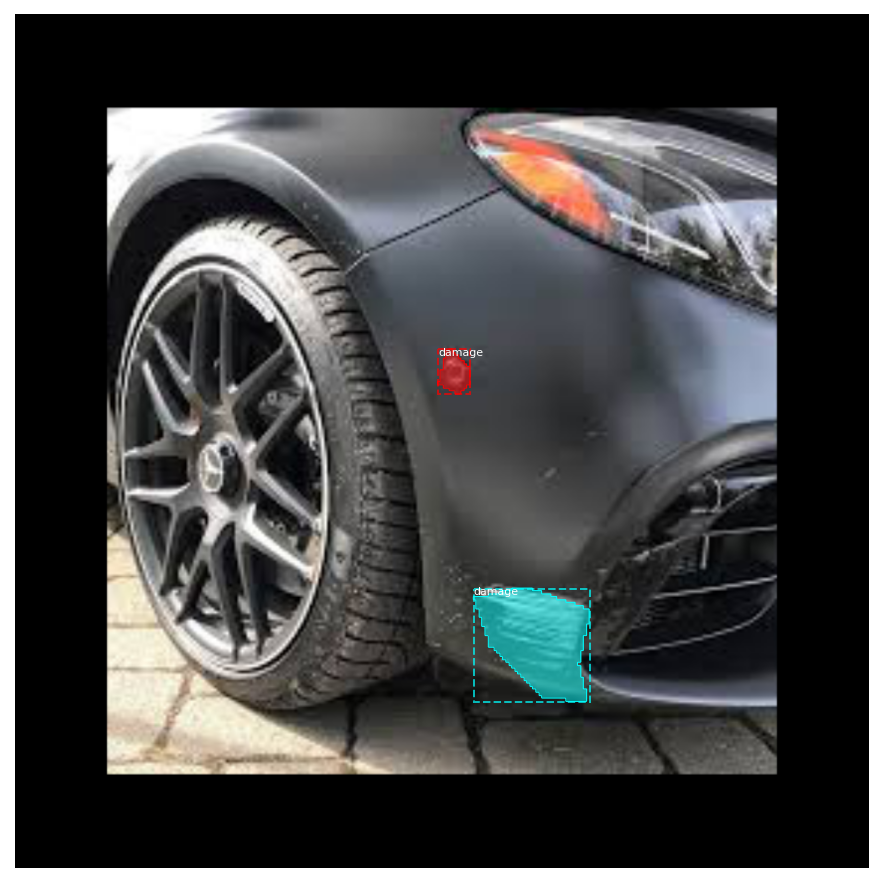

In [30]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

### 6.1) Add augmentation and mask resizing.


mask                     shape: (56, 56, 2)           min:    0.00000  max:    1.00000  bool


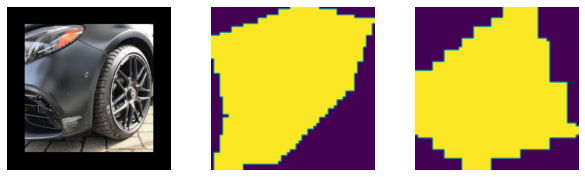

In [31]:
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

In [32]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  261888
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Level 0. Anchors: 196608  Feature map Shape: [256 256]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
Level 4. Anchors:    768  Feature map Shape: [16 16]


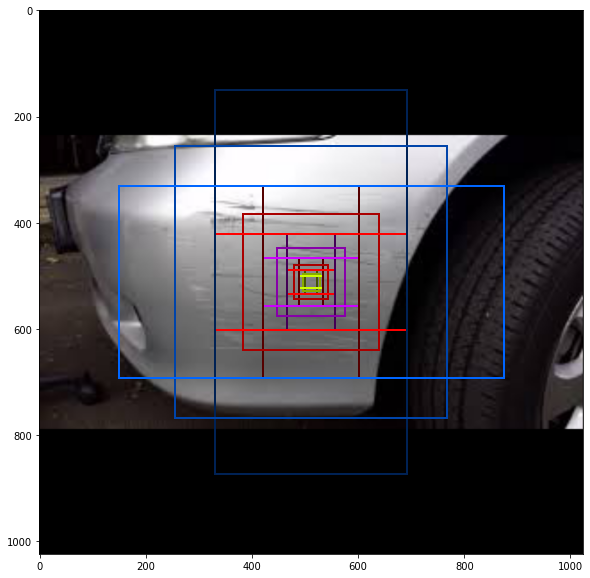

In [33]:
# Load and draw random image
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

In [34]:
# Create data generator
random_rois = 2000
g = modellib.data_generator(
    dataset, config, shuffle=True, random_rois=random_rois, 
    batch_size=4,
    detection_targets=True)

In [35]:
# Get Next Image
if random_rois:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_class_ids, gt_boxes, gt_masks, rpn_rois, rois], \
    [mrcnn_class_ids, mrcnn_bbox, mrcnn_mask] = next(g)
    
    log("rois", rois)
    log("mrcnn_class_ids", mrcnn_class_ids)
    log("mrcnn_bbox", mrcnn_bbox)
    log("mrcnn_mask", mrcnn_mask)
else:
    [normalized_images, image_meta, rpn_match, rpn_bbox, gt_boxes, gt_masks], _ = next(g)
    
log("gt_class_ids", gt_class_ids)
log("gt_boxes", gt_boxes)
log("gt_masks", gt_masks)
log("rpn_match", rpn_match, )
log("rpn_bbox", rpn_bbox)
image_id = modellib.parse_image_meta(image_meta)["image_id"][0]
print("image_id: ", image_id, dataset.image_reference(image_id))

# Remove the last dim in mrcnn_class_ids. It's only added
# to satisfy Keras restriction on target shape.
mrcnn_class_ids = mrcnn_class_ids[:,:,0]

rois                     shape: (4, 200, 4)           min:    0.00000  max: 1022.00000  int32
mrcnn_class_ids          shape: (4, 200, 1)           min:    0.00000  max:    1.00000  int32
mrcnn_bbox               shape: (4, 200, 2, 4)        min:   -3.86555  max:    2.96348  float32
mrcnn_mask               shape: (4, 200, 28, 28, 2)   min:    0.00000  max:    1.00000  float32
gt_class_ids             shape: (4, 100)              min:    0.00000  max:    1.00000  int32
gt_boxes                 shape: (4, 100, 4)           min:    0.00000  max: 1018.00000  int32
gt_masks                 shape: (4, 56, 56, 100)      min:    0.00000  max:    1.00000  bool
rpn_match                shape: (4, 261888, 1)        min:   -1.00000  max:    1.00000  int32
rpn_bbox                 shape: (4, 256, 4)           min:   -2.67582  max:    2.22352  float64
image_id:  27 /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/image30.jpg


anchors                  shape: (261888, 4)           min: -362.03867  max: 1322.03867  float64
refined_anchors          shape: (3, 4)                min:  339.00000  max:  728.00000  float32
Positive anchors: 3
Negative anchors: 253
Neutral anchors: 261632
BG                     : 165
damage                 : 35


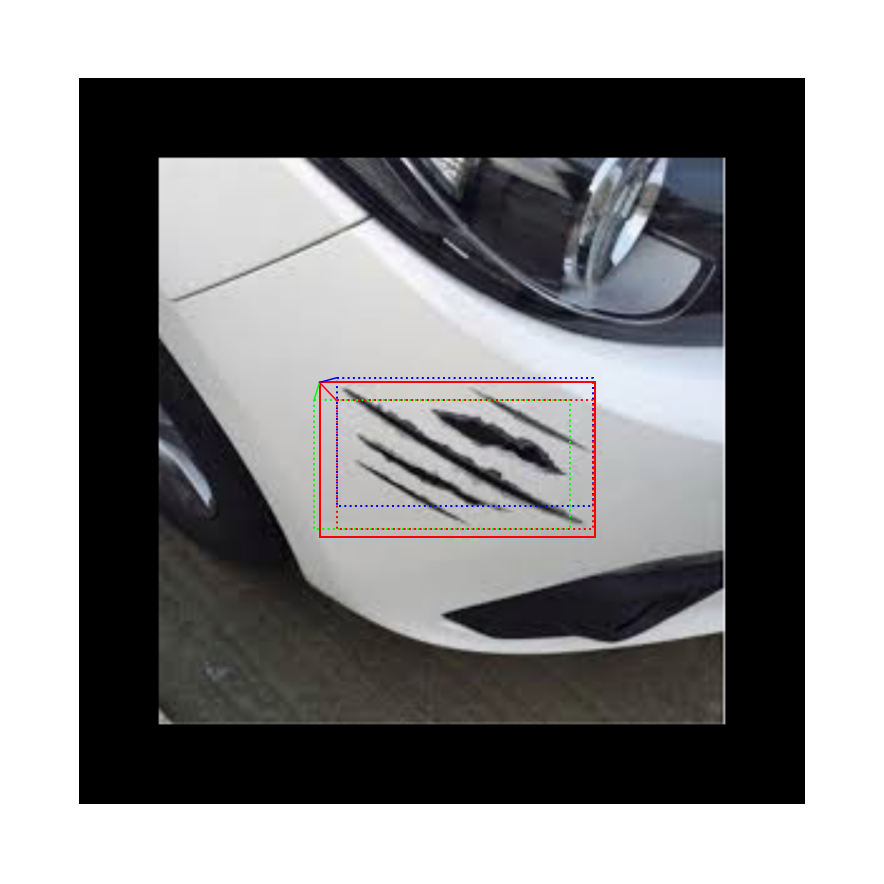

In [36]:
b = 0

# Restore original image (reverse normalization)
sample_image = modellib.unmold_image(normalized_images[b], config)

# Compute anchor shifts.
indices = np.where(rpn_match[b] == 1)[0]
refined_anchors = utils.apply_box_deltas(anchors[indices], rpn_bbox[b, :len(indices)] * config.RPN_BBOX_STD_DEV)
log("anchors", anchors)
log("refined_anchors", refined_anchors)

# Get list of positive anchors
positive_anchor_ids = np.where(rpn_match[b] == 1)[0]
print("Positive anchors: {}".format(len(positive_anchor_ids)))
negative_anchor_ids = np.where(rpn_match[b] == -1)[0]
print("Negative anchors: {}".format(len(negative_anchor_ids)))
neutral_anchor_ids = np.where(rpn_match[b] == 0)[0]
print("Neutral anchors: {}".format(len(neutral_anchor_ids)))

# ROI breakdown by class
for c, n in zip(dataset.class_names, np.bincount(mrcnn_class_ids[b].flatten())):
    if n:
        print("{:23}: {}".format(c[:20], n))

# Show positive anchors
fig, ax = plt.subplots(1, figsize=(16, 16))
visualize.draw_boxes(sample_image, boxes=anchors[positive_anchor_ids], 
                     refined_boxes=refined_anchors, ax=ax)

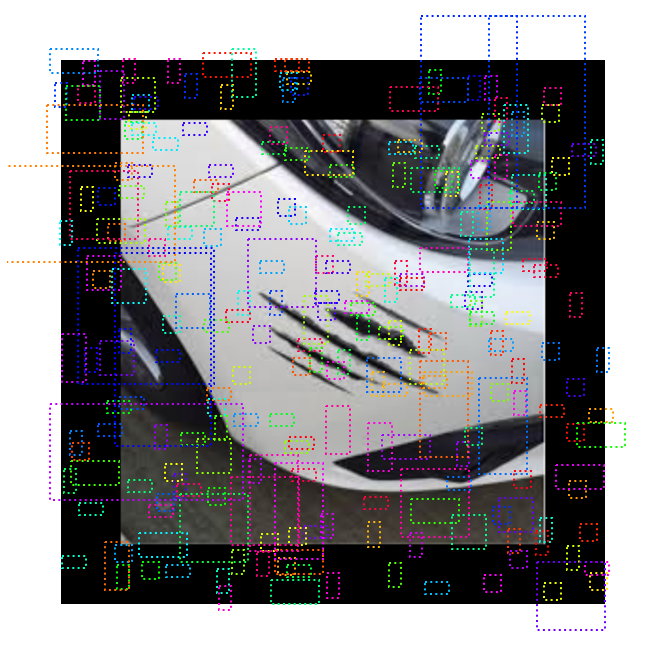

In [37]:
visualize.draw_boxes(sample_image, boxes=anchors[negative_anchor_ids])

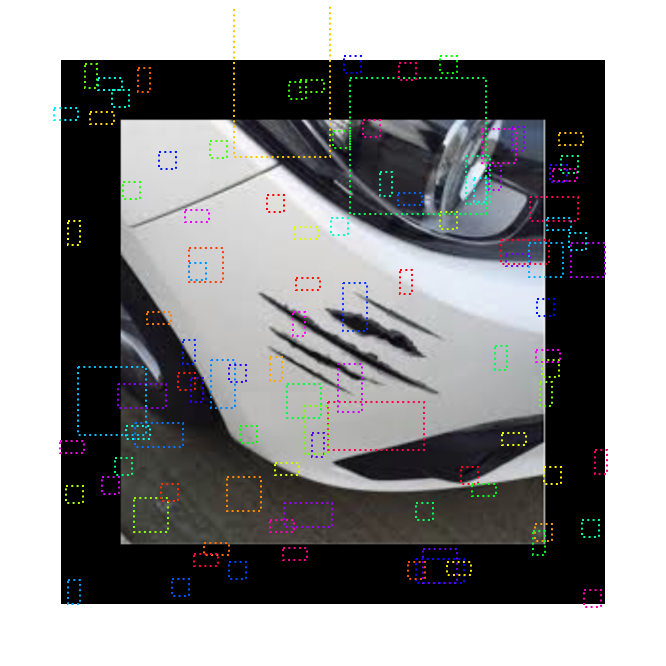

In [38]:
visualize.draw_boxes(sample_image, boxes=anchors[np.random.choice(neutral_anchor_ids, 100)])

Positive ROIs:  35
Negative ROIs:  165
Positive Ratio: 0.17
Negative Ratio: 0.82
Unique ROIs: 200 out of 200


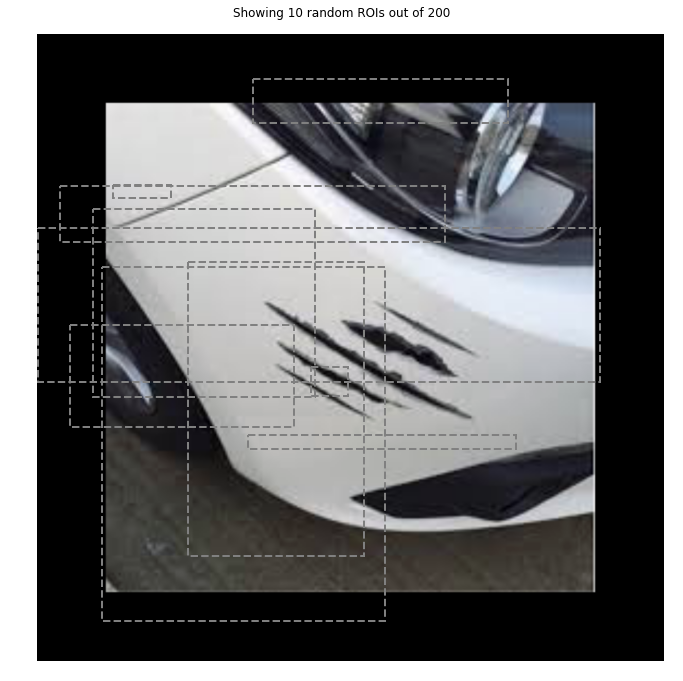

In [39]:
if random_rois:
    # Class aware bboxes
    bbox_specific = mrcnn_bbox[b, np.arange(mrcnn_bbox.shape[1]), mrcnn_class_ids[b], :]

    # Refined ROIs
    refined_rois = utils.apply_box_deltas(rois[b].astype(np.float32), bbox_specific[:,:4] * config.BBOX_STD_DEV)

    # Class aware masks
    mask_specific = mrcnn_mask[b, np.arange(mrcnn_mask.shape[1]), :, :, mrcnn_class_ids[b]]

    visualize.draw_rois(sample_image, rois[b], refined_rois, mask_specific, mrcnn_class_ids[b], dataset.class_names)
    
    # Any repeated ROIs?
    rows = np.ascontiguousarray(rois[b]).view(np.dtype((np.void, rois.dtype.itemsize * rois.shape[-1])))
    _, idx = np.unique(rows, return_index=True)
    print("Unique ROIs: {} out of {}".format(len(idx), rois.shape[1]))

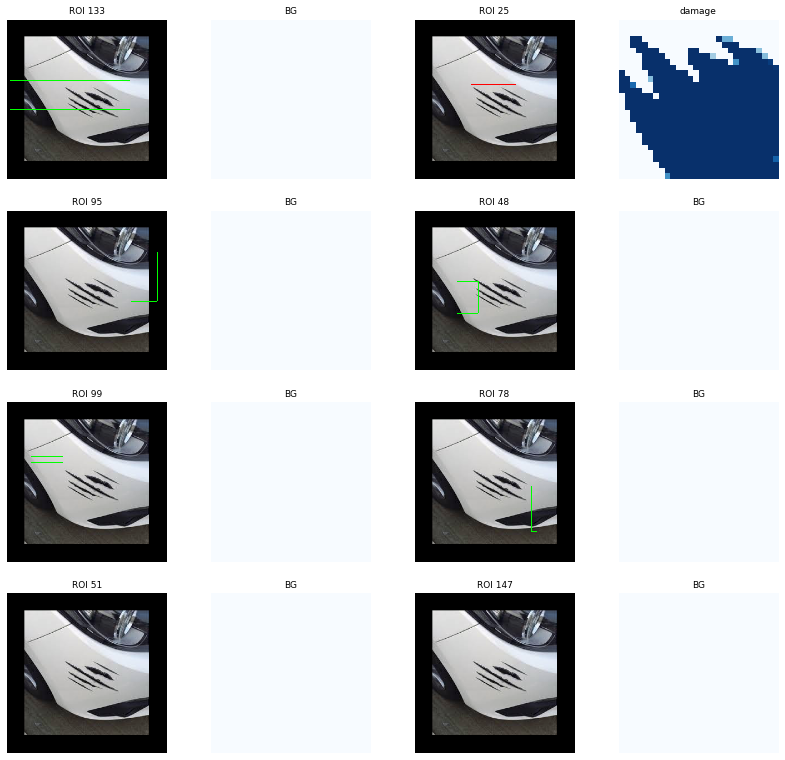

In [40]:
if random_rois:
    ids = random.sample(range(rois.shape[1]), 8)

    images = []
    titles = []
    for i in ids:
        image = visualize.draw_box(sample_image.copy(), rois[b,i,:4].astype(np.int32), [255, 0, 0])
        image = visualize.draw_box(image, refined_rois[i].astype(np.int64), [0, 255, 0])
        images.append(image)
        titles.append("ROI {}".format(i))
        images.append(mask_specific[i] * 255)
        titles.append(dataset.class_names[mrcnn_class_ids[b,i]][:20])

    display_images(images, titles, cols=4, cmap="Blues", interpolation="none")

In [41]:
if random_rois:
    limit = 10
    temp_g = modellib.data_generator(
        dataset, config, shuffle=True, random_rois=10000, 
        batch_size=1, detection_targets=True)
    total = 0
    for i in range(limit):
        _, [ids, _, _] = next(temp_g)
        positive_rois = np.sum(ids[0] > 0)
        total += positive_rois
        print("{:5} {:5.2f}".format(positive_rois, positive_rois/ids.shape[1]))
    print("Average percent: {:.2f}".format(total/(limit*ids.shape[1])))

   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
   66  0.33
Average percent: 0.33


In [42]:
#Annotation file load
annotations1 = json.load(open(os.path.join(ROOT_DIR, "/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/via_region_data.json"),encoding="utf8"))
annotations = list(annotations1.values()) 
annotations = [a for a in annotations if a['regions']]
annotations[0]

{'base64_img_data': '',
 'file_attributes': {},
 'filename': 'image2.jpg',
 'fileref': '',
 'regions': {'0': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [428,
     429,
     480,
     518,
     557,
     577,
     610,
     660,
     642,
     578,
     579,
     585,
     590,
     574,
     580,
     516,
     507,
     474,
     427,
     426,
     412,
     412,
     430,
     470,
     452,
     428],
    'all_points_y': [232,
     216,
     198,
     193,
     212,
     238,
     237,
     242,
     248,
     248,
     260,
     292,
     343,
     409,
     417,
     441,
     443,
     427,
     413,
     381,
     324,
     301,
     288,
     249,
     231,
     232],
    'name': 'polygon'}},
  '1': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [470,
     500,
     578,
     718,
     670,
     594,
     553,
     510,
     469,
     448,
     470],
    'all_points_y': [516, 548, 562, 557, 569, 

### 6.2) The components of image annotations are X and Y co-ordinates of all labeled damages which are marked using polygon' and class name is 'scratch' for the car images

In [43]:
# Loading the Annotation File
annotations1 = json.load(open(os.path.join(ROOT_DIR, "/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/train/via_region_data.json"),encoding="utf8"))
annotations = list(annotations1.values()) 
annotations = [a for a in annotations if a['regions']]
# image2.jpg
display("Annotation File Details : " ,annotations[0])

'Annotation File Details : '

{'base64_img_data': '',
 'file_attributes': {},
 'filename': 'image2.jpg',
 'fileref': '',
 'regions': {'0': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [428,
     429,
     480,
     518,
     557,
     577,
     610,
     660,
     642,
     578,
     579,
     585,
     590,
     574,
     580,
     516,
     507,
     474,
     427,
     426,
     412,
     412,
     430,
     470,
     452,
     428],
    'all_points_y': [232,
     216,
     198,
     193,
     212,
     238,
     237,
     242,
     248,
     248,
     260,
     292,
     343,
     409,
     417,
     441,
     443,
     427,
     413,
     381,
     324,
     301,
     288,
     249,
     231,
     232],
    'name': 'polygon'}},
  '1': {'region_attributes': {'Scratch': 'scratch'},
   'shape_attributes': {'all_points_x': [470,
     500,
     578,
     718,
     670,
     594,
     553,
     510,
     469,
     448,
     470],
    'all_points_y': [516, 548, 562, 557, 569, 


### 6.3) X and Y co-ordinates of the polygon to calculate area of the marked/detected damage

In [44]:
annotations[1]['regions']['0']['shape_attributes']
l = []
for d in annotations[1]['regions']['0']['shape_attributes'].values():
    l.append(d)
display('x co-ordinates of the damage car part:',l[1])    
display('y co-ordinates of the damage car part:',l[2])

'x co-ordinates of the damage car part:'

[293, 360, 349, 308, 293]

'y co-ordinates of the damage car part:'

[303, 330, 314, 302, 303]

## 7) Use the Inference mode code for Prediction and Damage Detection

#### Model description consists of Model Information like CNN architecture name: 'resnet101', ROI threshold = 0.9,configuration description, weightage of different loss components, mask shape, WEIGHT_DECAY etc. 


In [45]:
# Load the custom dataset
config = custom.CustomConfig()
ROOT_DIR = "/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN"
print(" ROOT Directory =" ,ROOT_DIR)
CUSTOM_DIR = os.path.join(ROOT_DIR + "/custom/")
print(" Custom Directory =" ,CUSTOM_DIR)
print("Model Description")
class InferenceConfig(config.__class__):
    # Run damage detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

DEVICE = "/cpu:0" 

# Inference mode for testing
TEST_MODE = "inference"

 ROOT Directory = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN
 Custom Directory = /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/
Model Description

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE           

## 8) Function to visualize predicted damage masks and load the model weights for prediction

In [46]:
# Get axis function tp create visualization
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# Reload library
from importlib import reload 
reload(visualize)

<module 'mrcnn.visualize' from '/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/Mask_RCNN/mrcnn/visualize.py'>

In [47]:
!pip3 show scikit-image

Name: scikit-image
Version: 0.16.2
Summary: Image processing routines for SciPy
Home-page: https://scikit-image.org
Author: None
Author-email: None
License: Modified BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, pillow, imageio, networkx, matplotlib, PyWavelets
Required-by: keras-vis, imgaug


In [48]:
!pip show h5py

Name: h5py
Version: 3.1.0
Summary: Read and write HDF5 files from Python
Home-page: http://www.h5py.org
Author: Andrew Collette
Author-email: andrew.collette@gmail.com
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: cached-property, numpy
Required-by: tensorflow, Keras, keras-vis


In [49]:
# Creating model in Inference mode
import tensorflow as tf
with tf.device(DEVICE):
  model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Loading the last best model which is trained
# weights_path = model.find_last()[1]
custom_WEIGHTS_PATH = '/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/logs/mask_rcnn_coco.h5'

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True, exclude=["mrcnn_class_logits","rpn_model","mrcnn_mask", "mrcnn_bbox_fc", "mrcnn_bbox"]) 

Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use fn_output_signature instead


Instructions for updating:
Use fn_output_signature instead


Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
Use `tf.cast` instead.


Loading weights  /content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/logs/mask_rcnn_coco.h5


## 9) Loading validation dataset for prediction

In [50]:
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR,'val')
dataset.prepare()
print('Images =  {}\nClasses = {}'.format(len(dataset.image_ids), dataset.class_names))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Images =  6
Classes = ['BG', 'damage']
  0. BG                                                
  1. damage                                            


## 10) Visualize model weight matrix descriptive statistics in the form of shapes, histograms

In [51]:
visualize.display_weight_stats(model)

## 11) Histogram of weights

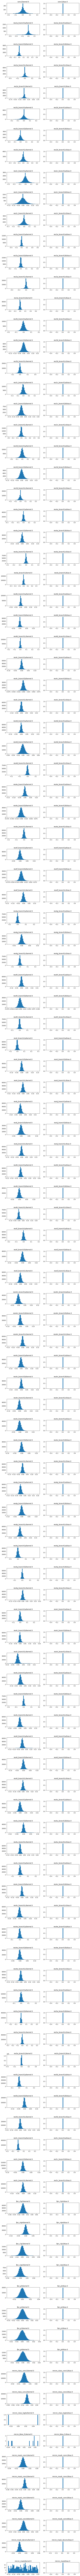

In [52]:
# layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']

# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)

## 12) Prediction on the random validation images


#### 1) Image 1

image ID: damage.image52.jpeg (1) /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/val/image52.jpeg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


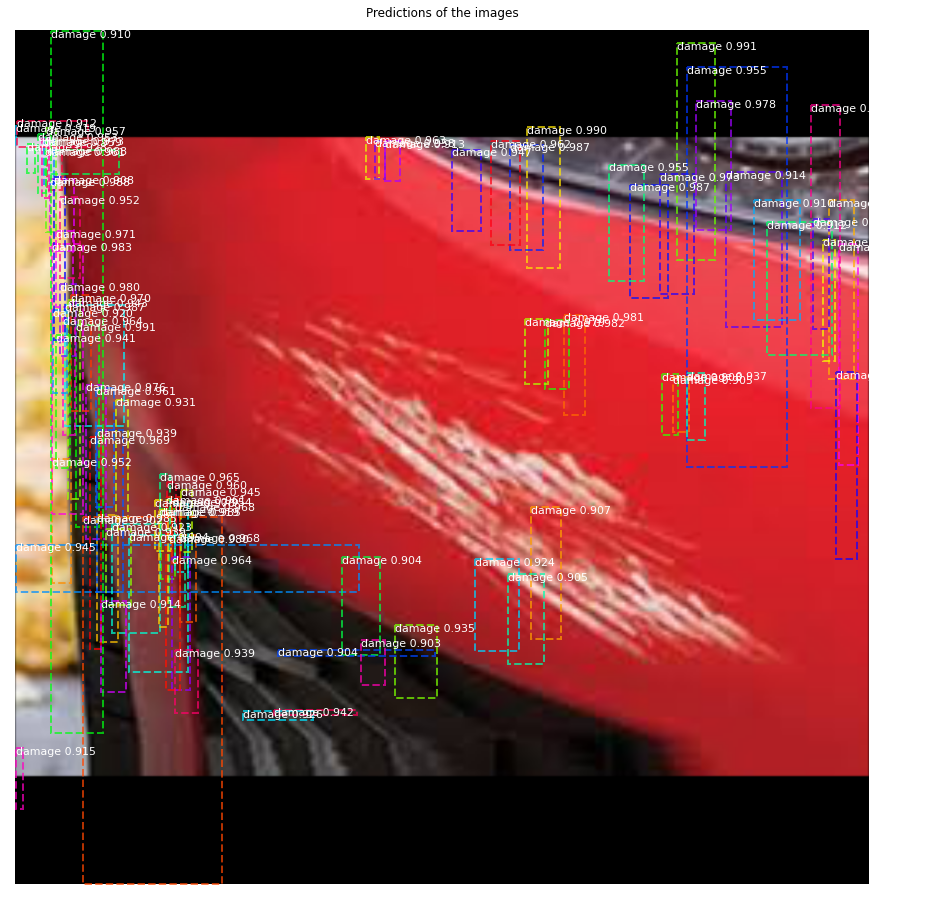

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  272.00000  max:  930.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
The car is having:1 damages


In [53]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=True)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Result for object detection 
results = model.detect([image], verbose=1)

# Display the results of visualization
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions of the images")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car is having:{} damages'.format(len(dataset.image_info[image_id]['polygons'])))

#### 2) Image 2

image ID: damage.image52.jpeg (1) /content/drive/My Drive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/val/image52.jpeg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  141.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


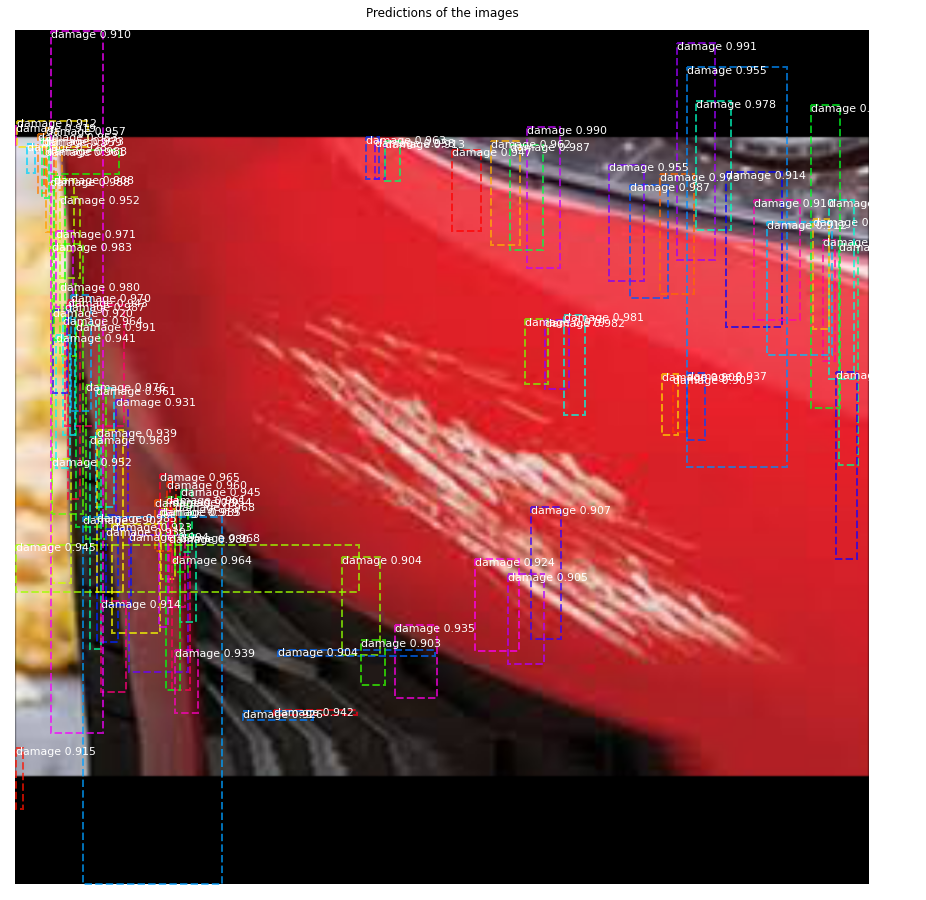

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  272.00000  max:  930.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
The car is having:1 damages


In [54]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=True)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Result for object detection
results = model.detect([image], verbose=1)

# Display the results of visualization
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions of the images")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car is having:{} damages'.format(len(dataset.image_info[image_id]['polygons'])))

## 13) Prediction on the test image (Unseen data)

Processing 1 images
image                    shape: (280, 390, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


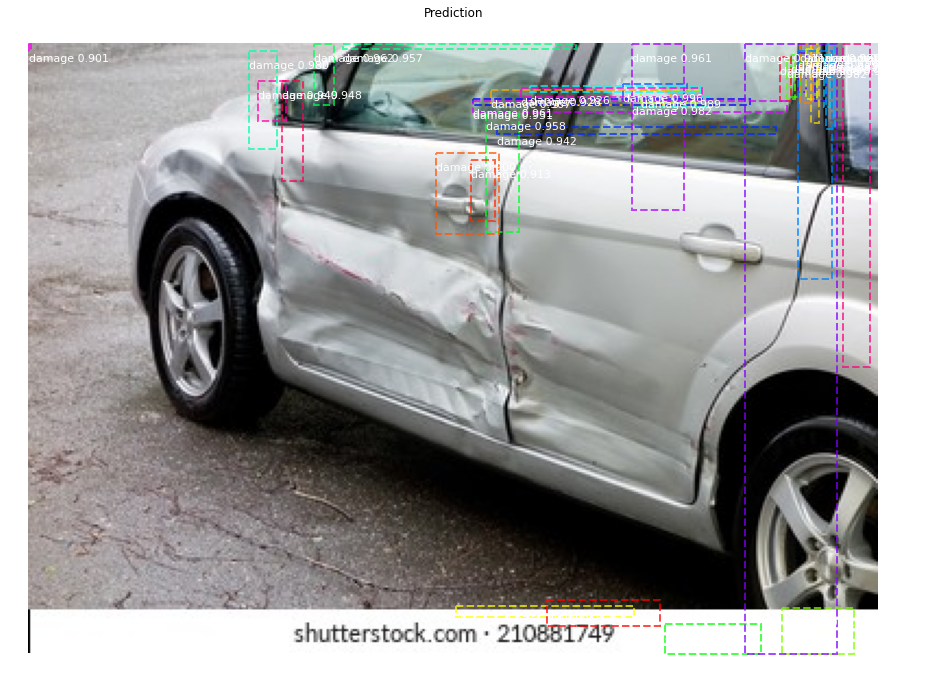

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  272.00000  max:  930.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
The car has:1 damage(s)


In [55]:
image = cv2.imread("/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/test/image60.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                   
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Prediction")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car has:{} damage(s)'.format(len(dataset.image_info[image_id]['polygons'])))

Processing 1 images
image                    shape: (800, 800, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


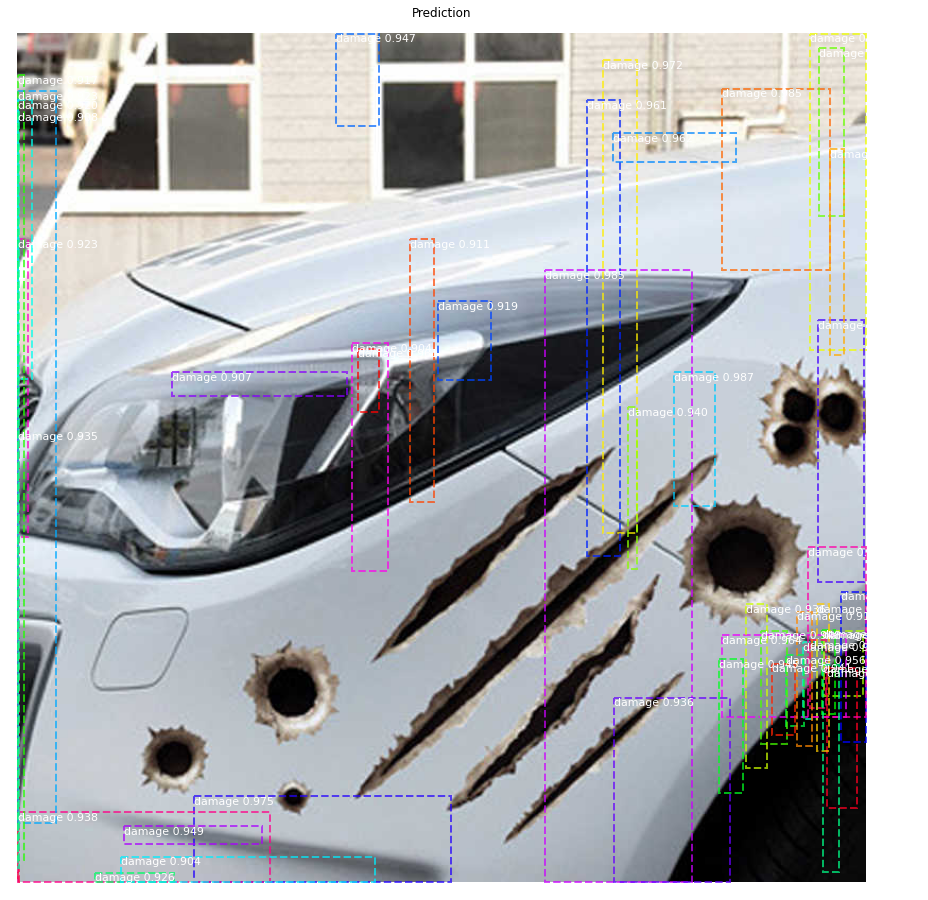

gt_class_id              shape: (1,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (1, 4)                min:  272.00000  max:  930.00000  int32
gt_mask                  shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
The car has:1 damage(s)


In [56]:
image = cv2.imread("/content/drive/MyDrive/DeepLearning_MaskRCNN/car-damage-detection-using-CNN/custom/test/image59.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                   
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Prediction")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('The car has:{} damage(s)'.format(len(dataset.image_info[image_id]['polygons'])))